# Read CALCLENS raytrace output file

In [1]:
import numpy as np
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.text as text
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.constants import *
import sympy as sp

In [2]:
header = np.dtype([('Headlen',np.int32),('NumFiles',np.int64),('PeanoCellHEALPixOrder',np.int64),('RayHEALPixOrder',np.int64),
          ('flag_defl',np.int64),('flag_phi',np.int64),
          ('pad',np.int8,216),('Headlen2',np.int32)])

ray = np.dtype([('nest',np.uint64),('ra','<f8'),('dec',np.double),
              ('A0',np.double),('A1',np.double),('A2',np.double),('A3',np.double),('phi',np.double)])

In [3]:
header

dtype([('Headlen', '<i4'), ('NumFiles', '<i8'), ('PeanoCellHEALPixOrder', '<i8'), ('RayHEALPixOrder', '<i8'), ('flag_defl', '<i8'), ('flag_phi', '<i8'), ('pad', 'i1', (216,)), ('Headlen2', '<i4')])

In [43]:
f = open('/cosma6/data/dp004/dc-boot5/raytrace/SHT_FullSky_Born/raydata0049.0000','rb')
#f = open('/Users/robin/Documents/OneDrive/Cosmology/Lens Planes/Rays/07-09-2018/raydata0100.0000','rb')
#f = open('/home/robin/Projects/calclens-0.9/outputs/raydata0001.0000','rb')
#f = open('E:/OneDrive/Cosmology/Lens Planes/Rays/16-03-2018/raydata0100.0000','rb')
#f = open('D:/Cosmological Data/CALCLENS/raydata0001.0000','rb')

In [18]:
plane = '0035'
i = 0
fname = 'raydata{}.{:04d}'.format(plane,i)  
f = open('/lustre/scratch/astro/rb460/outputs/SHT_only_FullSky/'+ fname)

FileNotFoundError: [Errno 2] No such file or directory: '/lustre/scratch/astro/rb460/outputs/SHT_only_FullSky/raydata0035.0000'

In [44]:
headdata=np.fromfile(f, dtype=header,count=1)

In [45]:
dummy = np.fromfile(f,np.dtype(np.int32),count=1)

In [46]:
nrays = np.fromfile(f, np.dtype(np.int64),count=dummy[0]//8)

In [47]:
dummy = np.fromfile(f,np.dtype(np.int32),count=1)

In [48]:
dummy = np.fromfile(f,np.dtype(np.int32),count=1)

In [49]:
startrays = np.fromfile(f, np.dtype(np.int64),count=dummy[0]//8)

In [50]:
dummy = np.fromfile(f,np.dtype(np.int32),count=1)
print("NbundleCells * 4 = ",dummy[0])

NbundleCells * 4 =  6291456


In [51]:
dummy = np.fromfile(f,np.dtype(np.int32),count=1)
print("NumRaysInFile*rays=",dummy[0])

NumRaysInFile*rays= 1610612736


In [52]:
raydata = np.fromfile(f,dtype=ray, count = dummy[0]//56)

In [53]:
tab=Table(raydata[::10000])
col=tab.columns['ra']
col.format = "%4.1f"
col=tab.columns['dec']
col.format = "%4.1f"
col=tab.columns['A0']
col.format = "%4.5f"
col=tab.columns['A1']
col.format = "%4.5f"
col=tab.columns['A2']
col.format = "%4.5f"
col=tab.columns['A3']
col.format = "%4.5f"
col=tab.columns['phi']
col.format = "%4.5e"
tab

nest,ra,dec,A0,A1,A2,A3,phi
uint64,float64,float64,float64,float64,float64,float64,float64
16777216,67.5,19.5,1.00000,-0.00000,-0.00000,1.00000,1.97626e-321
16791312,67.7,20.4,1.00000,-0.00000,-0.00000,1.00000,0.00000e+00
16812576,66.5,20.4,1.00000,0.00000,0.00000,1.00000,0.00000e+00
16816432,67.1,20.7,1.00000,0.00000,0.00000,1.00000,0.00000e+00
16835648,67.4,21.3,1.00000,0.00000,0.00000,1.00000,0.00000e+00
16809808,68.3,21.3,1.00000,0.00000,0.00000,1.00000,0.00000e+00
16794208,68.1,20.2,1.00000,0.00000,0.00000,1.00000,3.16202e-322
16851312,68.7,21.2,1.00000,0.00000,0.00000,1.00000,0.00000e+00
16846976,69.2,21.1,1.00000,-0.00000,-0.00000,1.00000,0.00000e+00


In [16]:
N=1e5 #number of particles in SIS
R = 1 #SIS radius in Megaparsecs
r_m = R * parsec * 1e6 #SIS radius in metres
m = 1e10 * 2e30 #particle mass = number of solar masses * solar mass
D_s = 1500 #distance from observer to source
D_ds = 750 #distance from lens plane to source
D_d = 750  #distance from observer to lens plane

theta_max = R/D_d / np.pi * 180 #convert SIS radius to degrees
print("theta_max= {:1.4f} degrees".format(theta_max))

sigma_v=  np.sqrt((N*m*G)/(r_m))
print('sigma_v={:4.3e} m/s'.format(sigma_v))

D = D_d * D_ds / D_s
print('Lens geometry factor = {:6.1f}'.format(D))

theta_max= 0.0764 degrees
sigma_v=2.080e+06 m/s
Lens geometry factor =  375.0


# Convergence plot

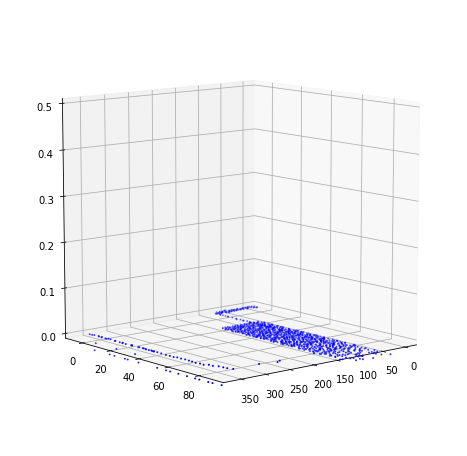

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(-10, 10, 50)
p = np.linspace(-10, 10, 50)
#R, P = np.meshgrid(r, p)

x = tab.columns['ra'] 
y = tab.columns['dec']
k = (1-0.5*(tab.columns['A0']+tab.columns['A3'])) 
z = tab.columns['phi']

# Plot the surface.
ax.scatter(x, y, k, color='b',s=1)
ax.view_init(10,50)

#ax.set_xlim(179.6,180.4)
#ax.set_ylim(-0.4,0.4)
ax.set_zlim(0, 0.5)


plt.show()

In [25]:
fix = 1

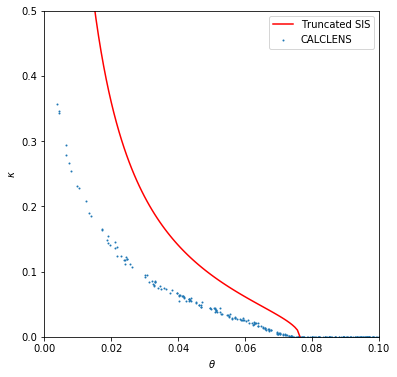

In [26]:
fig2,ax2 = plt.subplots(1,1,figsize=(6,6))

a = np.linspace(0.001, theta_max, 100)
theta=np.sqrt((x-180)*(x-180)+y*y)
b = (a * np.pi * D_d)/180
w = np.arctan(np.sqrt(R**2-b**2)/b)
ax2.scatter(theta,k, s=1,label='CALCLENS')
#ax2.plot(a,(2 * np.pi * sigma_v**2)/(c**2 * a) * D,c='r', label='Infinite SIS')
ax2.plot(a,(4 * sigma_v**2)/(c**2 * b) * D * w * fix ,c='r', label='Truncated SIS')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel('$\kappa$')
ax2.set_xlim(0,0.1)
ax2.set_ylim(0,0.5)
plt.legend()
plt.show()

# Shear plot

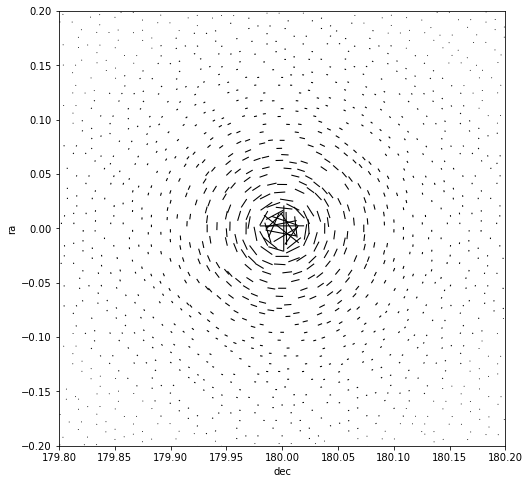

In [27]:
gamma1 = (0.5*(tab.columns['A0']-tab.columns['A3'])) 
gamma2 = -tab.columns['A1']
gamma = np.sqrt(gamma1**2+gamma2**2);

phi = 0.5 * np.arccos((gamma1)/gamma) * np.sign(gamma2)
    
u = gamma * np.sin(phi);
v = gamma * np.cos(phi);

fig, ax = plt.subplots(1, 1,figsize=(8,8))

qiv  = ax.quiver(x,y,u,v, pivot ='mid', scale= 5,headlength=0, headwidth=0, headaxislength=0)
ax.set_xlim(179.8,180.2)
ax.set_ylim(-0.2,0.2)
ax.set_xlabel('dec')
ax.set_ylabel('ra')

plt.show()

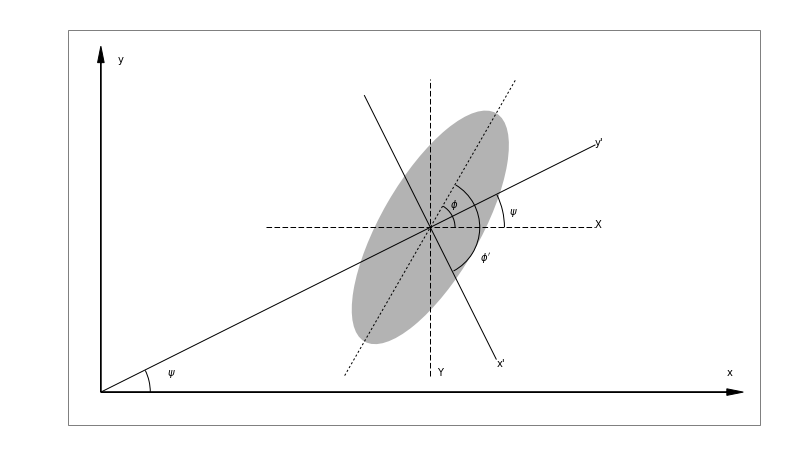

In [41]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.axis('off');                   
ax.add_patch(plt.Rectangle((-10, -10), 210, 120,fill=False,ec='0.5'))

ax.add_patch(patches.Ellipse((100,50), 30, 80, -30, fc='0.7'))

ax.add_line(plt.Line2D((0,150), (0, 75), lw=1, c='k'))
ax.annotate("X",xy=(150,50))

ax.add_line(plt.Line2D((80,120), (90, 10), lw=1, c='k'))
ax.annotate("x'",xy=(120,8))

ax.add_line(plt.Line2D((50,150), (50, 50), lw=1, c='k', ls='dashed'))
ax.annotate("y'",xy=(150,75))

ax.add_line(plt.Line2D((100,100), (5, 95), lw=1, c='k', ls='dashed'))
ax.annotate("Y",xy=(102,5))

ax.add_line(plt.Line2D((74,126), (5, 95), lw=1, c='k', ls='dotted'))

ax.arrow(0, 0, 0,100, head_width=2, head_length=5, fc='k', ec='k')
ax.annotate("y",xy=(5,100))
            
ax.arrow(0, 0, 190,0, head_width=2, head_length=5, fc='k', ec='k')
ax.annotate("x",xy=(190,5))

ax.add_patch(patches.Arc((0,0), 30, 30, angle=0.0, theta1=0, theta2=26))
ax.annotate(r"$\psi$",xy=(20,5))
ax.add_patch(patches.Arc((100,50), 45, 45, angle=0, theta1=0, theta2=26))
ax.annotate(r"$\psi$",xy=(124,54))
ax.add_patch(patches.Arc((100,50), 15, 15, angle=0.0, theta1=0, theta2=59))
ax.annotate(r"$\phi$",xy=(106,56))
ax.add_patch(patches.Arc((100,50), 30, 30, angle=0.0, theta1=-62, theta2=59))
ax.annotate(r"$\phi'$",xy=(115,40))

plt.axis('scaled')
plt.show()

$\psi = \arctan(ra/dec)$

$\phi^\prime = \pi/2 + \phi - \psi$

$\gamma_t = \gamma \cos(2 \phi^\prime)$

In [42]:
psi = np.arctan((x-180)/y);
phi_prime = np.pi/2 + phi - psi;
gamma_t = gamma * np.cos(2 * phi_prime);
#tabdata = zip(theta, x, y, psi, gamma, gamma_t);
#sortdata = sorted(tabdata, key=lambda x: x[0]);
#for (i,j,k,l,m,n) in sortdata:
#    print(i,j,k,l,m,n);

# Shear


$\gamma_t(x) = \dfrac{\bar{\Sigma}(x)-\Sigma(x)}{\Sigma_{crit}}$

For a truncated SIS:

$\Sigma_{SIS}(\xi) = 2\dfrac{\sigma_v^2}{2 \pi G} \displaystyle\int^{\sqrt{R^2-\xi^2}}_0 \dfrac{dz}{\xi^2+z^2}$

where $R$ is truncation radius

$\Sigma_{SIS}(\xi) = \dfrac{\sigma_v^2}{\pi G \xi} \left[\arctan{\dfrac{z}{\xi}} \right]^{\sqrt{R^2-\xi^2}}_{0}$

$\bar{\Sigma}_{SIS}(x) = \dfrac{2}{x^2} \displaystyle\int_0^x \xi \Sigma_{SIS}(\xi) d\xi$

$\bar{\Sigma}_{SIS}(x) = \dfrac{2}{x^2}\dfrac{\sigma_v^2}{\pi G}  \displaystyle\int_0^x \arctan{\left(\dfrac{\sqrt{R^2-\xi^2}}{\xi} \right)} d\xi$

Using normalised units, where $x = \xi/R$

$\bar{\Sigma}_{SIS}(x) = \dfrac{2}{x^2} \dfrac{\sigma_v^2}{\pi G} \left( 1 - \sqrt{1-x^2} + x \arctan{\left[ \dfrac{\sqrt{1-x^2}}{x} \right]}  \right)$

$\gamma_t(x) = \dfrac{\bar{\Sigma}(x)-\Sigma(x)}{\Sigma_{crit}}$

$\gamma_t(x) = \dfrac{4 \pi G}{c^2} \dfrac{D_d D_{ds}}{D_s}.\dfrac{\sigma_v^2}{\pi Gx}.
\left( \dfrac{2}{x} \left(1 -\sqrt{1-x^2} + x \arctan{\left[ \dfrac{\sqrt{1-x^2}}{x} \right]} \right)
- \arctan{\left[ \dfrac{\sqrt{1-x^2}}{x}  \right]} \right)$

For $x<R$:

$\gamma_t(x) = \dfrac{D_d D_{ds}}{D_s}.\dfrac{4\sigma_v^2}{c^2}.
\left( \dfrac{2}{x} \left(1 -\sqrt{1-x^2} \right) +  \arctan{\left[ \dfrac{\sqrt{1-x^2}}{x} \right]} \right)$

For $x>R$:

$\gamma_t(x) = \dfrac{D_d D_{ds}}{D_s}.\dfrac{4\sigma_v^2}{c^2}.
\left( \dfrac{2}{x} \left(1 -\sqrt{x^2 -1} \right) +  \arctan{\left[ \dfrac{\sqrt{x^2 -1}}{x} \right]} \right)$

In [43]:
fix = 0.4
e = np.linspace(theta_max, 0.5, 100)
d = (e * np.pi * D_d)/180
w1 = 2/b * (1 - np.sqrt(1-b**2)) + np.arctan(np.sqrt(1-b**2)/b) * fix
w2 =  2/d * (1 - np.sqrt(d**2 -1)) + np.arctan(np.sqrt(d**2 -1)/d) * fix

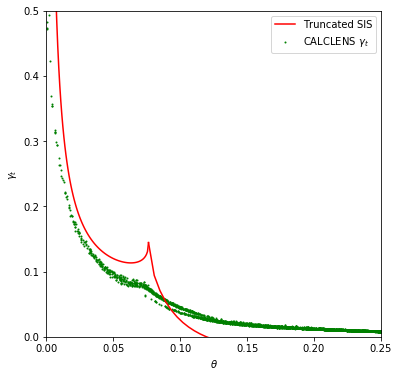

In [44]:
fig3,ax3 = plt.subplots(1,1,figsize=(6,6))

#ax3.scatter(theta,gamma, s=1,label='CALCLENS')
ax3.scatter(theta,gamma_t, c='g',s=1,label=r'CALCLENS $\gamma_t$')
#ax3.plot(a,(2 *np.pi * sigma_v**2)/(c**2 * b) * D,c='r', label='Infinite SIS')
ax3.plot(a,(4 * sigma_v**2)/(c**2 * b) * D * w1 ,c='r', label='Truncated SIS')
ax3.plot(e,(4 * sigma_v**2)/(c**2 * d) * D * w2  ,c='r')
ax3.set_xlabel(r'$\theta$')
ax3.set_ylabel(r'$\gamma_t$')
ax3.set_xlim(0,0.25)
ax3.set_ylim(0,0.5)
plt.legend()
plt.show()